# Clustering analysis

## To do

* Cluster analysis
* Other features
* Two-class analysis 1. ANT+BEL v 2. DUB

## Changes

* CA 9
* CA 8 added a simple KNN classification
* CA 8 added demographics first to MFCC_delta for another log reg, then to MFCC_delta_2 for a second new log reg
* CA 7 correct and refine classification metrics for AUC and ROC, mix the gender, age and MFCC features in an LR classification
* CA 6 added balanced class labels, pushing genders and ages alone down to 55%, amended split to be on recording number, avoiding the classification working by the speaker identificaiton alone
* CA 5 added MFCC as sole x input to log reg getting 70%+

## Imports and dependencies

In [11]:
import numpy as np
import pandas as pd
import soundfile as sf

In [12]:
import librosa
librosa.__version__ 
import librosa.display

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("seaborn")
import glob
import IPython
from IPython.display import Audio
import re
import csv

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import time

In [17]:
import os

## File inputs, directories, global variables

In [18]:
os.getcwd()

'C:\\Users\\GGMachines_Gaming\\Documents\\voxpop'

In [19]:
#INPUT_DIRECTORY="C:\\Users\\peter\\VoxPop\\commonaccent\\sample_output_directory\\" #output directory for sample files on i5

#INPUT_DIRECTORY="C:\\Users\\peter\\VoxPop\\" directory on i5 machine

INPUT_DIRECTORY='C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\'

In [20]:
os.chdir(INPUT_DIRECTORY)
os.getcwd()

'C:\\Users\\GGMachines_Gaming\\Documents\\voxpop'

In [26]:
# code for timing
#start_time = time.time()
#end_time=time.time()
#end_time - start_time # time in seconds

In [27]:
# Load files from Hickey (2004) Sound Atlas of Irish English aggreated into a dataframe with features and time series
# in pickle format
#
# SAIE after preprocessing 
#
# ANTBEL = Antrim and Belfast data sets from SAIE
# DUB - Dublin city and county datasets from SAIE

#antbel_df = pd.read_hdf('C:\\Users\\peter\\VoxPop\\sample_output_directory_2\\20240715_1812_ANT_features.h5', key='df')
#antbel_df = pd.read_hdf('C:\\Users\\peter\\VoxPop\\sample_output_directory_2\\20240718_2016_ANT_features.h5', key='df')
#"C:\Users\peter\VoxPop\sample_output_directory_2\20240718_2016_ANT_features.h5"
#antbel_df = pd.read_hdf('C:\\Users\\GGMachines_Gaming\\Documents\\sample_output_directory\\20240719_2335_ANT_features.h5', key='df')

dub_df = pd.read_pickle('C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\sample_output_directory\\20240721_0000_DUB_features.pkl') #i9 directory
antbel_df = pd.read_pickle('C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\sample_output_directory\\20240721_0013_ANT_features.pkl') #i9 directory


### Increase the numbering of the recordings in the second dataframe to account for the count of recordings in the first dataframe

In [28]:
recordings_count=antbel_df['recording num'].max()
recordings_count

65

In [29]:
#Increase the recording number in the 2nd dataframe so that there are no duplicates
dub_df['recording num']=dub_df['recording num']+recordings_count
dub_df['recording num']

0         65
1         65
2         65
3         65
4         65
        ... 
15095    231
15096    231
15097    231
15098    231
15099    231
Name: recording num, Length: 15100, dtype: object

## Merge the two dataframes

In [30]:
all_df= pd.concat([antbel_df, dub_df], ignore_index=True)

In [31]:
all_df['recording num'].max()

231

In [32]:
all_df[0:4]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
0,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,0,ANT_Antrim_R1_F_20_Rec_0_Sample_0.wav,"[-3.259629e-09, -1.9790605e-09, -1.8626451e-09...","[[-35.601192, -23.076942, -25.175114, -30.8771...",22050,"[[-494.3632, -314.76587, -256.5209, -248.23921...","[[22.54509, 22.54509, 22.54509, 22.54509, 22.5...","[[-13.363751, -13.363751, -13.363751, -13.3637..."
1,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,1,ANT_Antrim_R1_F_20_Rec_0_Sample_1.wav,"[-0.063719966, 0.018594107, 0.042440787, 0.011...","[[-24.939114, -19.037073, -35.540073, -40.6882...",22050,"[[-200.87267, -189.22813, -205.93425, -217.350...","[[1.7263998, 1.7263998, 1.7263998, 1.7263998, ...","[[8.442614, 8.442614, 8.442614, 8.442614, 8.44..."
2,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,2,ANT_Antrim_R1_F_20_Rec_0_Sample_2.wav,"[-0.009588398, -0.029184137, -0.023096263, -0....","[[-12.003866, -22.771717, -25.912066, -27.5487...",22050,"[[-269.9958, -209.71855, -199.9971, -192.51334...","[[7.1880474, 7.1880474, 7.1880474, 7.1880474, ...","[[-7.412616, -7.412616, -7.412616, -7.412616, ..."
3,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,3,ANT_Antrim_R1_F_20_Rec_0_Sample_3.wav,"[-0.02926175, -0.03246651, -0.03447114, -0.032...","[[-33.829704, -37.727036, -24.553106, -31.8029...",22050,"[[-319.19656, -307.64944, -314.54547, -295.997...","[[9.711183, 9.711183, 9.711183, 9.711183, 9.71...","[[-0.45292982, -0.45292982, -0.45292982, -0.45..."


## Select recordings randomly to go into TRAIN and TEST datasets

In [33]:
unique_recordings = all_df['recording num'].unique()
np.random.shuffle(unique_recordings)  # Shuffle the unique values

# Determine the split index
split_index = int(len(unique_recordings) * 0.80)
print(split_index)

185


In [34]:
unique_recordings

array([12, 32, 17, 88, 36, 75, 102, 174, 77, 175, 160, 196, 182, 149, 143,
       142, 132, 163, 100, 69, 202, 166, 61, 137, 144, 185, 121, 98, 23,
       195, 177, 94, 64, 162, 115, 97, 48, 134, 62, 82, 71, 26, 152, 111,
       224, 21, 10, 5, 168, 2, 135, 51, 222, 151, 188, 74, 219, 99, 68,
       194, 186, 122, 16, 18, 93, 231, 43, 59, 58, 198, 114, 133, 209,
       213, 150, 104, 63, 54, 78, 138, 8, 211, 0, 49, 212, 96, 190, 24,
       220, 215, 200, 9, 52, 27, 67, 130, 206, 123, 33, 210, 218, 3, 181,
       42, 155, 55, 119, 30, 169, 140, 127, 154, 165, 81, 72, 19, 91, 159,
       106, 230, 189, 25, 60, 126, 148, 214, 207, 84, 101, 70, 180, 191,
       90, 153, 95, 41, 38, 225, 47, 201, 199, 46, 22, 193, 1, 124, 113,
       34, 40, 223, 44, 50, 6, 129, 178, 13, 39, 192, 227, 108, 156, 4,
       141, 167, 73, 221, 205, 158, 197, 131, 53, 228, 86, 28, 29, 184,
       79, 65, 147, 92, 105, 11, 118, 56, 45, 125, 110, 204, 203, 171,
       136, 35, 80, 31, 176, 112, 170, 87, 208, 66, 8

In [35]:
print(unique_recordings[:split_index]) # TRAIN portion of the randomly shuffled dataset

[12 32 17 88 36 75 102 174 77 175 160 196 182 149 143 142 132 163 100 69
 202 166 61 137 144 185 121 98 23 195 177 94 64 162 115 97 48 134 62 82 71
 26 152 111 224 21 10 5 168 2 135 51 222 151 188 74 219 99 68 194 186 122
 16 18 93 231 43 59 58 198 114 133 209 213 150 104 63 54 78 138 8 211 0 49
 212 96 190 24 220 215 200 9 52 27 67 130 206 123 33 210 218 3 181 42 155
 55 119 30 169 140 127 154 165 81 72 19 91 159 106 230 189 25 60 126 148
 214 207 84 101 70 180 191 90 153 95 41 38 225 47 201 199 46 22 193 1 124
 113 34 40 223 44 50 6 129 178 13 39 192 227 108 156 4 141 167 73 221 205
 158 197 131 53 228 86 28 29 184 79 65 147 92 105 11 118 56 45]


In [36]:
print(unique_recordings[split_index:]) # TEST portion of the randomly shuffled dataset

[125 110 204 203 171 136 35 80 31 176 112 170 87 208 66 85 15 57 145 226
 120 107 7 173 20 103 109 146 117 139 116 217 128 157 37 183 164 89 161
 179 187 14 76 229 172 83 216]


In [40]:
# Split the unique values into two sets for train and test datasets WITH DIFFERENT SPEAKERS IN EACH
recording_train = unique_recordings[:split_index]
recording_test = unique_recordings[split_index:]

# Create two new DataFrames based on the split unique values
train_df = all_df[all_df['recording num'].isin(recording_train)].reset_index(drop=True)
test_df = all_df[all_df['recording num'].isin(recording_test)].reset_index(drop=True)

In [41]:
train_df[0:3]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
0,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,0,ANT_Antrim_R1_F_20_Rec_0_Sample_0.wav,"[-3.259629e-09, -1.9790605e-09, -1.8626451e-09...","[[-35.601192, -23.076942, -25.175114, -30.8771...",22050,"[[-494.3632, -314.76587, -256.5209, -248.23921...","[[22.54509, 22.54509, 22.54509, 22.54509, 22.5...","[[-13.363751, -13.363751, -13.363751, -13.3637..."
1,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,1,ANT_Antrim_R1_F_20_Rec_0_Sample_1.wav,"[-0.063719966, 0.018594107, 0.042440787, 0.011...","[[-24.939114, -19.037073, -35.540073, -40.6882...",22050,"[[-200.87267, -189.22813, -205.93425, -217.350...","[[1.7263998, 1.7263998, 1.7263998, 1.7263998, ...","[[8.442614, 8.442614, 8.442614, 8.442614, 8.44..."
2,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,2,ANT_Antrim_R1_F_20_Rec_0_Sample_2.wav,"[-0.009588398, -0.029184137, -0.023096263, -0....","[[-12.003866, -22.771717, -25.912066, -27.5487...",22050,"[[-269.9958, -209.71855, -199.9971, -192.51334...","[[7.1880474, 7.1880474, 7.1880474, 7.1880474, ...","[[-7.412616, -7.412616, -7.412616, -7.412616, ..."


In [42]:
test_df[0:3]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
0,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_B...,ANT_Ballyclare_R2_M_50,ANT,Ballyclare,R,2,M,50,102.32,7,0,ANT_Ballyclare_R2_M_50_Rec_7_Sample_0.wav,"[0.0, 5.820766e-11, 5.820766e-11, -2.3283064e-...","[[-41.179016, -26.363323, -29.417908, -41.1790...",22050,"[[-585.1823, -487.0132, -436.94373, -406.0873,...","[[42.252773, 42.252773, 42.252773, 42.252773, ...","[[3.173503, 3.173503, 3.173503, 3.173503, 3.17..."
1,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_B...,ANT_Ballyclare_R2_M_50,ANT,Ballyclare,R,2,M,50,102.32,7,1,ANT_Ballyclare_R2_M_50_Rec_7_Sample_1.wav,"[-0.012750386, -0.016613984, -0.019260466, -0....","[[-4.7035375, -10.568319, -35.159542, -25.6128...",22050,"[[-277.6698, -216.63957, -191.39378, -179.9454...","[[-27.75716, -27.75716, -27.75716, -27.75716, ...","[[-19.141376, -19.141376, -19.141376, -19.1413..."
2,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_B...,ANT_Ballyclare_R2_M_50,ANT,Ballyclare,R,2,M,50,102.32,7,2,ANT_Ballyclare_R2_M_50_Rec_7_Sample_2.wav,"[0.21122819, 0.20751588, 0.20271952, 0.1997801...","[[-2.6412978, -10.219597, -43.92991, -43.92991...",22050,"[[-160.00894, -185.25877, -258.0365, -297.2930...","[[-20.964441, -20.964441, -20.964441, -20.9644...","[[8.3602705, 8.3602705, 8.3602705, 8.3602705, ..."


In [43]:
all_df[0:3]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
0,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,0,ANT_Antrim_R1_F_20_Rec_0_Sample_0.wav,"[-3.259629e-09, -1.9790605e-09, -1.8626451e-09...","[[-35.601192, -23.076942, -25.175114, -30.8771...",22050,"[[-494.3632, -314.76587, -256.5209, -248.23921...","[[22.54509, 22.54509, 22.54509, 22.54509, 22.5...","[[-13.363751, -13.363751, -13.363751, -13.3637..."
1,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,1,ANT_Antrim_R1_F_20_Rec_0_Sample_1.wav,"[-0.063719966, 0.018594107, 0.042440787, 0.011...","[[-24.939114, -19.037073, -35.540073, -40.6882...",22050,"[[-200.87267, -189.22813, -205.93425, -217.350...","[[1.7263998, 1.7263998, 1.7263998, 1.7263998, ...","[[8.442614, 8.442614, 8.442614, 8.442614, 8.44..."
2,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,2,ANT_Antrim_R1_F_20_Rec_0_Sample_2.wav,"[-0.009588398, -0.029184137, -0.023096263, -0....","[[-12.003866, -22.771717, -25.912066, -27.5487...",22050,"[[-269.9958, -209.71855, -199.9971, -192.51334...","[[7.1880474, 7.1880474, 7.1880474, 7.1880474, ...","[[-7.412616, -7.412616, -7.412616, -7.412616, ..."


In [44]:
all_df['mfcc'][0]

array([[-4.94363190e+02, -3.14765869e+02, -2.56520905e+02,
        -2.48239212e+02, -2.53031876e+02, -2.55517334e+02,
        -2.48052017e+02, -2.32951981e+02, -2.19962173e+02,
        -1.42841690e+02, -9.73684616e+01, -1.10779991e+02,
        -1.32577957e+02, -1.74496826e+02, -2.58991180e+02,
        -2.96776947e+02, -2.27697571e+02, -1.72998871e+02,
        -1.91706116e+02, -2.18036591e+02, -2.23801773e+02,
        -2.41474701e+02, -2.48627243e+02, -2.24094589e+02,
        -2.06402664e+02, -2.12667801e+02, -2.53713226e+02,
        -2.99129425e+02, -2.24645386e+02, -1.94393921e+02,
        -2.14507462e+02, -1.99503799e+02, -1.75753983e+02,
        -1.97116699e+02, -2.48568222e+02, -2.64348511e+02,
        -2.66590698e+02, -2.86438263e+02, -2.94369110e+02,
        -2.90658600e+02, -2.94621582e+02, -2.69237000e+02,
        -1.65282639e+02, -1.53554474e+02],
       [ 3.61295471e+01,  8.51948547e+01,  1.05760651e+02,
         1.15315674e+02,  1.16228172e+02,  1.17554886e+02,
         1.22

In [47]:
y_train=train_df['counties']
y_test=test_df['counties']
print(y_train.shape)
print(y_test.shape)

(17375,)
(4219,)


In [48]:
print(y_train[0:3])

0    ANT
1    ANT
2    ANT
Name: counties, dtype: object


## Create the X_train and X_test, add one-hot encoding to the categorical variables for gender and age

In [55]:
X_train=train_df[['mfcc','mfcc_delta','mfcc_delta_2','genders','ages','recording num']] 
X_test=test_df[['mfcc','mfcc_delta','mfcc_delta_2','genders','ages','recording num']]

In [56]:
print(X_train.shape)
print(X_test.shape)

(17375, 6)
(4219, 6)


In [57]:
X_train[0:3]

,mfcc,mfcc_delta,mfcc_delta_2,genders,ages,recording num
0,"[[-494.3632, -314.76587, -256.5209, -248.23921...","[[22.54509, 22.54509, 22.54509, 22.54509, 22.5...","[[-13.363751, -13.363751, -13.363751, -13.3637...",F,20,0
1,"[[-200.87267, -189.22813, -205.93425, -217.350...","[[1.7263998, 1.7263998, 1.7263998, 1.7263998, ...","[[8.442614, 8.442614, 8.442614, 8.442614, 8.44...",F,20,0
2,"[[-269.9958, -209.71855, -199.9971, -192.51334...","[[7.1880474, 7.1880474, 7.1880474, 7.1880474, ...","[[-7.412616, -7.412616, -7.412616, -7.412616, ...",F,20,0


In [58]:
X_test[0:3]

,mfcc,mfcc_delta,mfcc_delta_2,genders,ages,recording num
0,"[[-585.1823, -487.0132, -436.94373, -406.0873,...","[[42.252773, 42.252773, 42.252773, 42.252773, ...","[[3.173503, 3.173503, 3.173503, 3.173503, 3.17...",M,50,7
1,"[[-277.6698, -216.63957, -191.39378, -179.9454...","[[-27.75716, -27.75716, -27.75716, -27.75716, ...","[[-19.141376, -19.141376, -19.141376, -19.1413...",M,50,7
2,"[[-160.00894, -185.25877, -258.0365, -297.2930...","[[-20.964441, -20.964441, -20.964441, -20.9644...","[[8.3602705, 8.3602705, 8.3602705, 8.3602705, ...",M,50,7


In [59]:
# One-hot encoding: Put one column in for every value of the categorical variables
X_train = pd.get_dummies(X_train, columns=['genders','ages'],prefix=[None,None])

X_test  = pd.get_dummies(X_test, columns=['genders','ages'],prefix=[None,None])

### Check for one-hot columns that are in one dataframe but not the other

In [60]:
X_train.columns.tolist()

['mfcc',
 'mfcc_delta',
 'mfcc_delta_2',
 'recording num',
 'F',
 'M',
 15,
 16,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 80]

In [61]:
X_test.columns.tolist()

['mfcc',
 'mfcc_delta',
 'mfcc_delta_2',
 'recording num',
 'F',
 'M',
 15,
 20,
 30,
 35,
 50,
 60]

In [62]:
# Find columns in train but not in test
missing_in_X_test = X_train.columns.difference(X_test.columns).tolist()
missing_in_X_test

[16, 25, 40, 45, 55, 65, 70, 80]

In [63]:
# Find columns in test but not in train
missing_in_X_train = X_test.columns.difference(X_train.columns).tolist()
missing_in_X_train

[]

In [64]:
# Add missing columns with False values
for col in  missing_in_X_test:
    X_test[col] = pd.Series([False] * len(X_test), index=X_test.index)

In [65]:
# Add missing columns with False values
for col in  missing_in_X_train:
    X_train[col] = pd.Series([False] * len(X_train), index=X_train.index)

In [66]:
X_train[0:4]

,mfcc,mfcc_delta,mfcc_delta_2,recording num,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80
0,"[[-494.3632, -314.76587, -256.5209, -248.23921...","[[22.54509, 22.54509, 22.54509, 22.54509, 22.5...","[[-13.363751, -13.363751, -13.363751, -13.3637...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,"[[-200.87267, -189.22813, -205.93425, -217.350...","[[1.7263998, 1.7263998, 1.7263998, 1.7263998, ...","[[8.442614, 8.442614, 8.442614, 8.442614, 8.44...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,"[[-269.9958, -209.71855, -199.9971, -192.51334...","[[7.1880474, 7.1880474, 7.1880474, 7.1880474, ...","[[-7.412616, -7.412616, -7.412616, -7.412616, ...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,"[[-319.19656, -307.64944, -314.54547, -295.997...","[[9.711183, 9.711183, 9.711183, 9.711183, 9.71...","[[-0.45292982, -0.45292982, -0.45292982, -0.45...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,"[[-238.38216, -228.49149, -256.09305, -273.210...","[[15.645952, 15.645952, 15.645952, 15.645952, ...","[[11.970617, 11.970617, 11.970617, 11.970617, ...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,"[[-110.30995, -99.04926, -126.198555, -136.179...","[[-18.052214, -18.052214, -18.052214, -18.0522...","[[-4.0458364, -4.0458364, -4.0458364, -4.04583...",231,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17371,"[[-97.73651, -89.979546, -113.11529, -134.1764...","[[-12.304473, -12.304473, -12.304473, -12.3044...","[[1.0900352, 1.0900352, 1.0900352, 1.0900352, ...",231,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17372,"[[-239.09358, -160.47281, -144.84918, -154.863...","[[6.8850102, 6.8850102, 6.8850102, 6.8850102, ...","[[-6.6832395, -6.6832395, -6.6832395, -6.68323...",231,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17373,"[[-87.451416, -108.45021, -148.85347, -161.430...","[[-3.5998185, -3.5998185, -3.5998185, -3.59981...","[[2.0841863, 2.0841863, 2.0841863, 2.0841863, ...",231,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [68]:
X_test[0:4]

,mfcc,mfcc_delta,mfcc_delta_2,recording num,F,M,15,20,30,35,50,60,16,25,40,45,55,65,70,80
0,"[[-585.1823, -487.0132, -436.94373, -406.0873,...","[[42.252773, 42.252773, 42.252773, 42.252773, ...","[[3.173503, 3.173503, 3.173503, 3.173503, 3.17...",7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,"[[-277.6698, -216.63957, -191.39378, -179.9454...","[[-27.75716, -27.75716, -27.75716, -27.75716, ...","[[-19.141376, -19.141376, -19.141376, -19.1413...",7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,"[[-160.00894, -185.25877, -258.0365, -297.2930...","[[-20.964441, -20.964441, -20.964441, -20.9644...","[[8.3602705, 8.3602705, 8.3602705, 8.3602705, ...",7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,"[[-279.27066, -263.6307, -275.66638, -242.0697...","[[22.27862, 22.27862, 22.27862, 22.27862, 22.2...","[[-1.6087068, -1.6087068, -1.6087068, -1.60870...",7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [69]:
# Reorder columns to match the original order in df1
X_test = X_test[X_train.columns]

In [70]:
X_train.columns = X_train.columns.astype(str) 
X_test.columns = X_test.columns.astype(str) 

In [71]:
y_test

0       ANT
1       ANT
2       ANT
3       ANT
4       ANT
       ... 
4214    DUB
4215    DUB
4216    DUB
4217    DUB
4218    DUB
Name: counties, Length: 4219, dtype: object

## Model 2 - Logistic regression on genders and ages only, 3 data classes DUB, ANT and BEL

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17375, 20)
(4219, 20)
(17375,)
(4219,)


In [74]:
X_train_2 = X_train.drop(columns=['mfcc','mfcc_delta','mfcc_delta_2','recording num'])
X_test_2 = X_test.drop(columns=['mfcc','mfcc_delta','mfcc_delta_2','recording num'])

y_train_2 = y_train.drop(columns=['mfcc','mfcc_delta','mfcc_delta_2','recording num'])
y_test_2 = y_test.drop(columns=['mfcc','mfcc_delta','mfcc_delta_2','recording num'])

In [75]:
X_train_2['80'].count()

17375

In [76]:
X_test_2

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4215,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4216,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4217,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [77]:
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=2)

In [78]:
lr2 = LogisticRegression(multi_class='ovr',max_iter=1000, class_weight='balanced')
# OVR is One versus the Rest: One after the other, one of the output classes is treated as the positive case, all the others as the negative
lr2.fit(X_train_2, y_train_2)


C:\Users\GGMachines_Gaming\.conda\envs\audio6\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr')

In [79]:
y_pred_2 = lr2.predict(X_test_2)

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [81]:
accuracy = accuracy_score(y_test_2, y_pred_2)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 43.26%


In [82]:
print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

         ANT       0.50      0.29      0.37       664
         BEL       0.03      1.00      0.06        66
         DUB       0.89      0.45      0.60      3489

    accuracy                           0.43      4219
   macro avg       0.47      0.58      0.34      4219
weighted avg       0.82      0.43      0.55      4219



In [83]:
conf_matrix = confusion_matrix(y_test_2, y_pred_2)

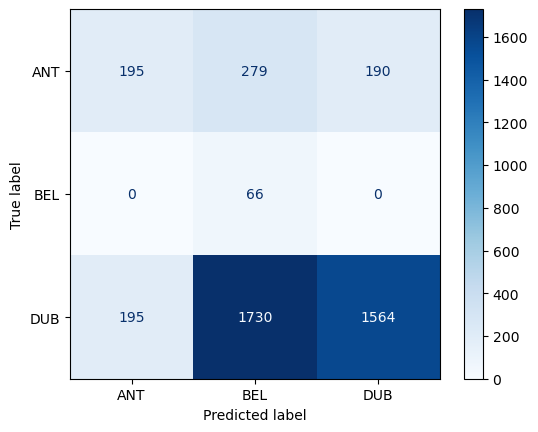

In [84]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lr2.classes_)
disp.plot(cmap='Blues')

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve

In [86]:
#!pip install scipy==1.11.4 #interp needs scipy 1.11.14

In [87]:
from scipy import interp
from itertools import cycle
from sklearn.preprocessing import label_binarize

In [88]:
y_score_2 = lr2.predict_proba(X_test_2) # probabilities for each observation to be in each class
print(y_score_2)

[[0.61073013 0.01324247 0.3760274 ]
 [0.61073013 0.01324247 0.3760274 ]
 [0.61073013 0.01324247 0.3760274 ]
 ...
 [0.61175429 0.22211358 0.16613213]
 [0.61175429 0.22211358 0.16613213]
 [0.61175429 0.22211358 0.16613213]]


In [89]:
y_score_2[0].sum()

0.9999999999999999

In [90]:
y_test_2[0]

'ANT'

In [91]:
# Binarize the output labels
y_test_2_binarized = label_binarize(y_test_2, classes=['ANT','BEL','DUB'])  
n_classes = y_test_2_binarized.shape[1]

In [92]:
from sklearn.metrics import roc_curve, auc

In [95]:
y_prob_2 = lr2.predict_proba(X_test_2)

In [96]:
y_prob_2.shape

(4219, 3)

In [97]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test_2, y_prob_2, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2%}")

ROC AUC Score: 67.24%


In [93]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2_binarized[:, i], y_score_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area: this averages the metrics across all classes
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2_binarized.ravel(), y_score_2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

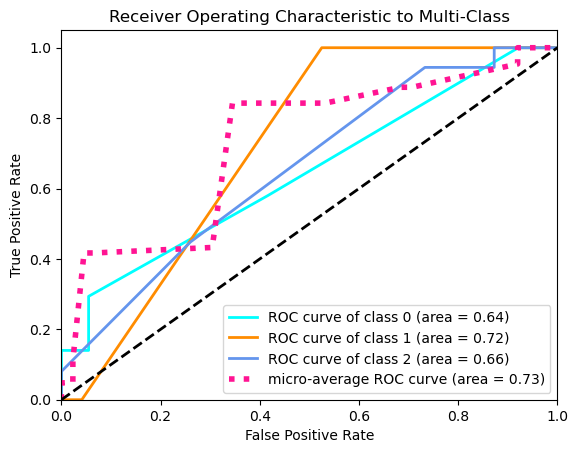

In [94]:
# Plot ROC curves
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()


## Model 3 - MFCC as sole input

### We flatten the observations of MFCC from a 2d array to a 1d series to feed into the model

In [98]:
flattened=[]

In [99]:
flattened_index=X_train.index

In [100]:
for j in X_train['mfcc']:
    flattened.append(np.array(j.flatten()))    

In [101]:
type(flattened)

list

In [102]:
print(len(flattened))

17375


In [103]:
X_train_3 = pd.Series(flattened, index=flattened_index)

In [104]:
X_train_3.shape

(17375,)

In [105]:
X_train_3[0].shape

(880,)

In [106]:
type(X_train_3[0])

numpy.ndarray

In [107]:
X_train_3 = np.stack(X_train_3.values)

In [108]:
X_train_3[0]

array([-4.94363190e+02, -3.14765869e+02, -2.56520905e+02, -2.48239212e+02,
       -2.53031876e+02, -2.55517334e+02, -2.48052017e+02, -2.32951981e+02,
       -2.19962173e+02, -1.42841690e+02, -9.73684616e+01, -1.10779991e+02,
       -1.32577957e+02, -1.74496826e+02, -2.58991180e+02, -2.96776947e+02,
       -2.27697571e+02, -1.72998871e+02, -1.91706116e+02, -2.18036591e+02,
       -2.23801773e+02, -2.41474701e+02, -2.48627243e+02, -2.24094589e+02,
       -2.06402664e+02, -2.12667801e+02, -2.53713226e+02, -2.99129425e+02,
       -2.24645386e+02, -1.94393921e+02, -2.14507462e+02, -1.99503799e+02,
       -1.75753983e+02, -1.97116699e+02, -2.48568222e+02, -2.64348511e+02,
       -2.66590698e+02, -2.86438263e+02, -2.94369110e+02, -2.90658600e+02,
       -2.94621582e+02, -2.69237000e+02, -1.65282639e+02, -1.53554474e+02,
        3.61295471e+01,  8.51948547e+01,  1.05760651e+02,  1.15315674e+02,
        1.16228172e+02,  1.17554886e+02,  1.22276215e+02,  1.27962784e+02,
        1.27946182e+02,  

In [112]:
flattened=[]

In [113]:
flattened_index=X_test.index

In [114]:
for j in X_test['mfcc']:
    flattened.append(np.array(j.flatten()))  

In [115]:
print(len(flattened))

4219


In [116]:
X_test_3 = pd.Series(flattened, index=flattened_index)

In [117]:
X_test_3 = np.stack(X_test_3.values)

In [118]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [119]:
scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

In [120]:
lr3=LogisticRegression(multi_class='ovr', max_iter=10000, class_weight='balanced')
lr3.fit(X_train_3, y_train)

C:\Users\GGMachines_Gaming\.conda\envs\audio6\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr')

In [121]:
# Make predictions
y_pred_3 = lr3.predict(X_test_3)

In [122]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_3)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 74.40%


In [123]:
y_prob_3 = lr3.predict_proba(X_test_3)

In [124]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

         ANT       0.48      0.52      0.50       664
         BEL       0.08      0.82      0.15        66
         DUB       0.96      0.79      0.86      3489

    accuracy                           0.74      4219
   macro avg       0.51      0.71      0.50      4219
weighted avg       0.87      0.74      0.80      4219



In [125]:
conf_matrix = confusion_matrix(y_test, y_pred_3)

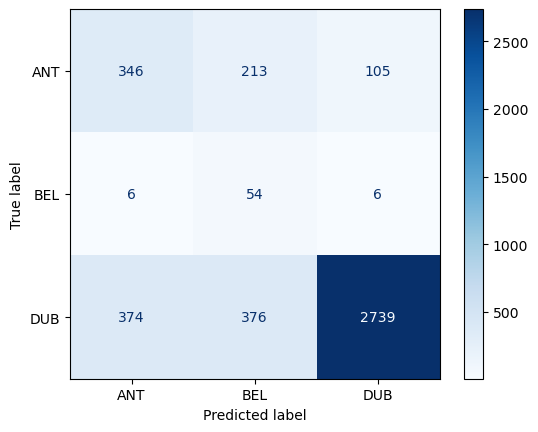

In [126]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lr3.classes_)
disp.plot(cmap='Blues')

In [127]:
y_prob_3 = lr3.predict_proba(X_test_3)

In [128]:
y_prob_3.shape

(4219, 3)

In [129]:
y_prob_3[:, 1]

array([0.05570146, 0.16441659, 0.06576642, ..., 0.09780719, 0.06891341,
       0.20868366])

In [130]:
y_prob_3[0]

array([0.42021725, 0.05570146, 0.52408129])

In [131]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob_3, multi_class='ovr')
# OVR is One versus the Rest: One after the other, one of the output classes is treated as the positive case, all the others as the negative
print(f"ROC AUC Score: {roc_auc:.2%}")


ROC AUC Score: 88.40%


In [132]:
y_score_3 = lr3.predict_proba(X_test_3) # probabilities for each observation to be in each class
y_score_3

array([[0.42021725, 0.05570146, 0.52408129],
       [0.03030014, 0.16441659, 0.80528327],
       [0.62931734, 0.06576642, 0.30491624],
       ...,
       [0.06853889, 0.09780719, 0.83365392],
       [0.08107396, 0.06891341, 0.85001264],
       [0.13837457, 0.20868366, 0.65294178]])

In [133]:
y_score_3[0].sum()

1.0

In [134]:
y_test[0]

'ANT'

In [135]:
# Binarize the output labels
y_test_3_binarized = label_binarize(y_test, classes=['ANT','BEL','DUB'])  
n_classes = y_test_3_binarized.shape[1]

In [136]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_3_binarized[:, i], y_score_3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area: : this averages the metrics across all classes
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_3_binarized.ravel(), y_score_3.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

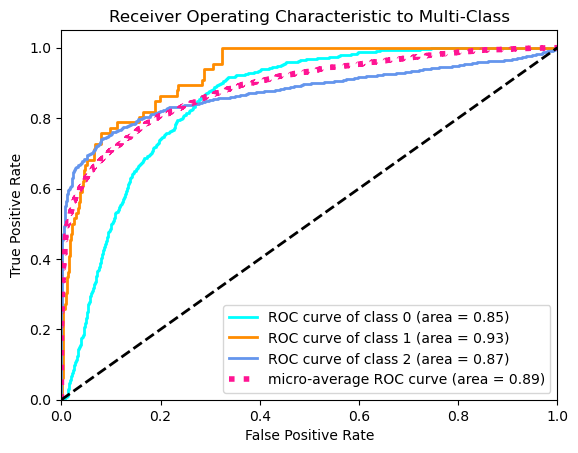

In [137]:
# Plot ROC curves
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()


## Model 4: MFCC plus age and genders as inputs

In [138]:
(X_train_3).shape

(17375, 880)

In [139]:
type(X_train_3)

numpy.ndarray

In [140]:
X_train_3[0].shape

(880,)

In [141]:
type(X_train_3[0])

numpy.ndarray

In [142]:
X_train_4=X_train_2.copy(deep=True)


In [143]:
X_test_4=X_test_2.copy(deep=True)

In [144]:
X_train_4['mfcc']=list(X_train_3)


In [145]:
X_test_4['mfcc']=list(X_test_3)


In [146]:
X_train_4

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80,mfcc
0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-2.1866508, -0.64308554, 0.086820245, 0.18534..."
1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[0.93851817, 0.8629535, 0.7295461, 0.577573, 0..."
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[0.20247592, 0.617136, 0.8049803, 0.89295524, ..."
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-0.32142767, -0.5577119, -0.65040755, -0.4210..."
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[0.5391067, 0.39192268, 0.09225635, -0.1317422..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[1.9028553, 1.9448028, 1.7426233, 1.6082841, 1..."
17371,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[2.0367408, 2.0536094, 1.9088521, 1.6337217, 1..."
17372,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[0.5315313, 1.2079226, 1.505659, 1.3710366, 1...."
17373,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[2.1462593, 1.8320223, 1.4547827, 1.2876446, 1..."


In [147]:
X_test_4

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80,mfcc
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[-3.1537182, -2.709486, -2.2055316, -1.8190259..."
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[0.1207609, 0.5341066, 0.91428924, 1.0525432, ..."
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[1.3736465, 0.91057277, 0.06756394, -0.4375465..."
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[0.10371449, -0.029632157, -0.15643153, 0.2636..."
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[-1.9283748, -0.98702097, -0.07827723, 0.27239..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[-1.1121869, -1.1781247, -1.1910671, -1.154446..."
4215,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[1.6786717, 1.6410384, 1.405609, 1.1542922, 0...."
4216,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[1.3682047, 1.2704772, 1.5770305, 1.6637126, 1..."
4217,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[-0.68751365, -0.82650244, -0.8282981, -0.8635..."


In [148]:
X_train_3

array([[-2.1866508 , -0.64308554,  0.08682024, ...,  0.06813625,
        -0.15681395,  0.0924673 ],
       [ 0.93851817,  0.8629535 ,  0.7295461 , ...,  1.8066669 ,
         1.6704121 ,  2.0740669 ],
       [ 0.20247592,  0.617136  ,  0.8049803 , ..., -0.30227593,
        -0.86274046, -0.51588   ],
       ...,
       [ 0.5315313 ,  1.2079226 ,  1.505659  , ...,  0.26585707,
        -1.0591234 , -0.8442532 ],
       [ 2.1462593 ,  1.8320223 ,  1.4547827 , ..., -0.31333408,
        -0.09413914, -0.04226546],
       [ 1.2655095 ,  0.98702484,  0.52394676, ..., -1.739631  ,
        -1.3342298 , -0.5293052 ]], dtype=float32)

In [149]:
X_train_4['mfcc']=list(X_train_3)

In [150]:
X_train_4

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80,mfcc
0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-2.1866508, -0.64308554, 0.086820245, 0.18534..."
1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[0.93851817, 0.8629535, 0.7295461, 0.577573, 0..."
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[0.20247592, 0.617136, 0.8049803, 0.89295524, ..."
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-0.32142767, -0.5577119, -0.65040755, -0.4210..."
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[0.5391067, 0.39192268, 0.09225635, -0.1317422..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[1.9028553, 1.9448028, 1.7426233, 1.6082841, 1..."
17371,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[2.0367408, 2.0536094, 1.9088521, 1.6337217, 1..."
17372,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[0.5315313, 1.2079226, 1.505659, 1.3710366, 1...."
17373,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[2.1462593, 1.8320223, 1.4547827, 1.2876446, 1..."


In [151]:
X_train_4.iloc[0,16].shape

(880,)

In [152]:
X_train_4.iloc[0,16]

array([-2.18665075e+00, -6.43085539e-01,  8.68202448e-02,  1.85343176e-01,
        1.19080290e-01,  7.95202628e-02,  1.63268313e-01,  3.47901225e-01,
        5.12241244e-01,  1.49997592e+00,  2.08456850e+00,  1.91476059e+00,
        1.63717711e+00,  1.10135639e+00,  1.68212466e-02, -4.66534138e-01,
        4.19789046e-01,  1.11604154e+00,  8.79869044e-01,  5.43944776e-01,
        4.71637130e-01,  2.43005976e-01,  1.50783733e-01,  4.68352646e-01,
        6.91597462e-01,  6.06431782e-01,  8.53958353e-02, -4.88655567e-01,
        4.77583766e-01,  8.74215901e-01,  6.15740776e-01,  8.06096673e-01,
        1.10622263e+00,  8.29922616e-01,  1.72721103e-01, -3.18647586e-02,
       -6.09964207e-02, -3.11747998e-01, -4.07713175e-01, -3.58557373e-01,
       -4.04248238e-01, -7.64618367e-02,  1.18232858e+00,  1.45467782e+00,
       -1.81892347e+00, -7.02599585e-01, -2.21951738e-01,  1.44341802e-02,
        3.11675463e-02,  5.69171458e-02,  1.68749377e-01,  3.04041922e-01,
        3.04773271e-01, -

In [153]:
print(y_train.shape)
print(X_train_4.shape)

(17375,)
(17375, 17)


In [154]:
print(X_train_4.dtypes)

F         bool
M         bool
15        bool
16        bool
20        bool
25        bool
30        bool
35        bool
40        bool
45        bool
50        bool
55        bool
60        bool
65        bool
70        bool
80        bool
mfcc    object
dtype: object


In [155]:
train_df['mfcc'][0].shape

(20, 44)

In [156]:
train_df['mfcc'][17150].shape

(20, 44)

In [157]:
train_df['mfcc'][0][0].shape

(44,)

In [158]:
train_df['mfcc'][0][0]

array([-494.3632 , -314.76587, -256.5209 , -248.23921, -253.03188,
       -255.51733, -248.05202, -232.95198, -219.96217, -142.84169,
        -97.36846, -110.77999, -132.57796, -174.49683, -258.99118,
       -296.77695, -227.69757, -172.99887, -191.70612, -218.03659,
       -223.80177, -241.4747 , -248.62724, -224.09459, -206.40266,
       -212.6678 , -253.71323, -299.12943, -224.64539, -194.39392,
       -214.50746, -199.5038 , -175.75398, -197.1167 , -248.56822,
       -264.3485 , -266.5907 , -286.43826, -294.3691 , -290.6586 ,
       -294.62158, -269.237  , -165.28264, -153.55447], dtype=float32)

In [159]:
X_test_4

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80,mfcc
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[-3.1537182, -2.709486, -2.2055316, -1.8190259..."
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[0.1207609, 0.5341066, 0.91428924, 1.0525432, ..."
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[1.3736465, 0.91057277, 0.06756394, -0.4375465..."
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[0.10371449, -0.029632157, -0.15643153, 0.2636..."
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[-1.9283748, -0.98702097, -0.07827723, 0.27239..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[-1.1121869, -1.1781247, -1.1910671, -1.154446..."
4215,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[1.6786717, 1.6410384, 1.405609, 1.1542922, 0...."
4216,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[1.3682047, 1.2704772, 1.5770305, 1.6637126, 1..."
4217,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[-0.68751365, -0.82650244, -0.8282981, -0.8635..."


In [160]:
# Assuming 'C' is the column with arrays of shape (880,)
arrays_col = pd.DataFrame(X_test_4['mfcc'].tolist(), index=X_test_4.index)
arrays_col.columns = [f'C_{i}' for i in range(arrays_col.shape[1])]

# Drop the original column and concatenate the expanded columns
X_test_4 = X_test_4.drop(columns=['mfcc']).join(arrays_col)

In [161]:
# Assuming 'C' is the column with arrays of shape (880,)
arrays_col = pd.DataFrame(X_train_4['mfcc'].tolist(), index=X_train_4.index)
arrays_col.columns = [f'C_{i}' for i in range(arrays_col.shape[1])]

# Drop the original column and concatenate the expanded columns
X_train_4 = X_train_4.drop(columns=['mfcc']).join(arrays_col)


In [162]:
X_train_4.shape

(17375, 896)

In [163]:
X_test_4.shape

(4219, 896)

In [164]:
lr4=LogisticRegression(multi_class='ovr', max_iter=10000, class_weight='balanced')
lr4.fit(X_train_4, y_train)

C:\Users\GGMachines_Gaming\.conda\envs\audio6\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr')

In [165]:
# Make predictions
y_pred_4= lr4.predict(X_test_4)

In [166]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_4)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 71.53%


In [167]:
y_prob_4 = lr4.predict_proba(X_test_4)

In [168]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

         ANT       0.42      0.32      0.37       664
         BEL       0.07      0.86      0.14        66
         DUB       0.93      0.79      0.85      3489

    accuracy                           0.72      4219
   macro avg       0.48      0.66      0.45      4219
weighted avg       0.84      0.72      0.77      4219



In [169]:
conf_matrix = confusion_matrix(y_test, y_pred_4)

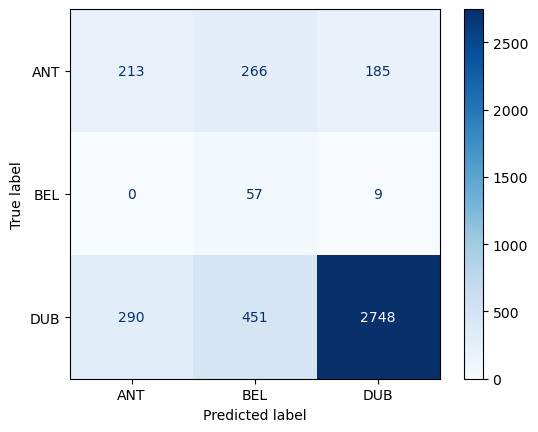

In [170]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lr4.classes_)
disp.plot(cmap='Blues')

In [171]:
y_prob_4 = lr4.predict_proba(X_test_4)

In [172]:
y_prob_4.shape

(4219, 3)

In [173]:
y_prob_4[:, 1]

array([1.15933722e-04, 5.56621066e-05, 4.96464847e-05, ...,
       3.36523320e-02, 1.88739807e-02, 1.45393598e-01])

In [174]:
y_prob_4[0]

array([6.54380994e-02, 1.15933722e-04, 9.34445967e-01])

In [175]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob_4, multi_class='ovr')
# OVR is One versus the Rest: One after the other, one of the output classes is treated as the positive case, all the others as the negative
print(f"ROC AUC Score: {roc_auc:.2%}")


ROC AUC Score: 86.91%


In [176]:
y_score_4 = lr4.predict_proba(X_test_4) # probabilities for each observation to be in each class
y_score_4

array([[6.54380994e-02, 1.15933722e-04, 9.34445967e-01],
       [2.54795595e-02, 5.56621066e-05, 9.74464778e-01],
       [3.93752591e-01, 4.96464847e-05, 6.06197763e-01],
       ...,
       [7.07451928e-01, 3.36523320e-02, 2.58895740e-01],
       [6.36368620e-01, 1.88739807e-02, 3.44757400e-01],
       [7.90248925e-01, 1.45393598e-01, 6.43574768e-02]])

In [177]:
y_score_4[0].sum()

1.0000000000000002

In [178]:
y_test[0]

'ANT'

In [179]:
# Binarize the output labels
y_test_4_binarized = label_binarize(y_test, classes=['ANT','BEL','DUB'])  
n_classes = y_test_4_binarized.shape[1]

In [180]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_4_binarized[:, i], y_score_4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area: : this averages the metrics across all classes
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_4_binarized.ravel(), y_score_3.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

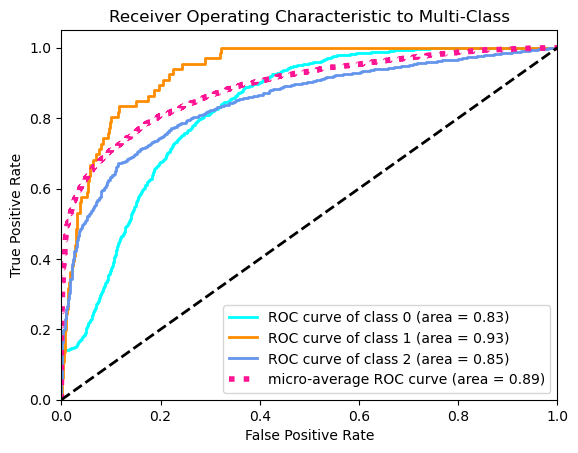

In [181]:
# Plot ROC curves
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()


## Model 5: MFCC_delta plus age and genders as inputs

In [194]:
def preprocess_features(feature: str ='mfcc_delta', input: pd.DataFrame =X_train, output: pd.DataFrame ='X_train_5', ): 
    flattened=[]
    flattened_index=input.index
    for j in input[feature]:
        flattened.append(np.array(j.flatten()))
    print(len(flattened))
    output = pd.Series(flattened, index=flattened_index)
    output = np.stack(output.values)
    return output

In [195]:
train_features = preprocess_features(feature="mfcc_delta", input=X_train,output='train_features')

17375


In [196]:
test_features = preprocess_features(feature="mfcc_delta", input=X_test,output='test_features')

4219


In [198]:
X_train_5 = X_train_2.copy(deep=True)

In [199]:
X_test_5 = X_test_2.copy(deep=True)

In [200]:
X_train_5['mfcc_delta']=list(train_features)


In [201]:
X_test_5['mfcc_delta']=list(test_features)


In [202]:
X_train_5

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80,mfcc_delta
0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[22.54509, 22.54509, 22.54509, 22.54509, 22.54..."
1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[1.7263998, 1.7263998, 1.7263998, 1.7263998, 1..."
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[7.1880474, 7.1880474, 7.1880474, 7.1880474, 7..."
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[9.711183, 9.711183, 9.711183, 9.711183, 9.711..."
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[15.645952, 15.645952, 15.645952, 15.645952, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-18.052214, -18.052214, -18.052214, -18.05221..."
17371,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-12.304473, -12.304473, -12.304473, -12.30447..."
17372,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[6.8850102, 6.8850102, 6.8850102, 6.8850102, 6..."
17373,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-3.5998185, -3.5998185, -3.5998185, -3.599818..."


In [203]:
X_test_5

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80,mfcc_delta
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[42.252773, 42.252773, 42.252773, 42.252773, 4..."
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[-27.75716, -27.75716, -27.75716, -27.75716, -..."
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[-20.964441, -20.964441, -20.964441, -20.96444..."
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[22.27862, 22.27862, 22.27862, 22.27862, 22.27..."
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[13.522847, 13.522847, 13.522847, 13.522847, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[29.905113, 29.905113, 29.905113, 29.905113, 2..."
4215,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[-31.884285, -31.884285, -31.884285, -31.88428..."
4216,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[1.1220073, 1.1220073, 1.1220073, 1.1220073, 1..."
4217,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[1.3988444, 1.3988444, 1.3988444, 1.3988444, 1..."


In [204]:
X_test_5.columns

Index(['F', 'M', '15', '16', '20', '25', '30', '35', '40', '45', '50', '55',
       '60', '65', '70', '80', 'mfcc_delta'],
      dtype='object')

In [205]:
arrays_col = pd.DataFrame(X_test_5['mfcc_delta'].tolist(), index=X_test_5.index)
arrays_col.columns = [f'C_{i}' for i in range(arrays_col.shape[1])]

# Drop the original column and concatenate the expanded columns
X_test_5 = X_test_5.drop(columns=['mfcc_delta']).join(arrays_col)

In [206]:
arrays_col = pd.DataFrame(X_train_5['mfcc_delta'].tolist(), index=X_train_5.index)
arrays_col.columns = [f'C_{i}' for i in range(arrays_col.shape[1])]

# Drop the original column and concatenate the expanded columns
X_train_5 = X_train_5.drop(columns=['mfcc_delta']).join(arrays_col)


In [207]:
X_train_5.shape

(17375, 896)

In [252]:
X_test_5.shape

(4219, 896)

In [209]:
scaler = StandardScaler()
X_train_5 = scaler.fit_transform(X_train_5)
X_test_5 = scaler.transform(X_test_5)

In [210]:
lr5=LogisticRegression(multi_class='ovr', max_iter=10000, class_weight='balanced')
lr5.fit(X_train_5, y_train)

C:\Users\GGMachines_Gaming\.conda\envs\audio6\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr')

In [211]:
# Make predictions
y_pred_5= lr5.predict(X_test_5)

In [212]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_5)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 56.81%


In [213]:
y_prob_5 = lr5.predict_proba(X_test_5)

In [214]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

         ANT       0.37      0.29      0.33       664
         BEL       0.04      0.73      0.07        66
         DUB       0.89      0.62      0.73      3489

    accuracy                           0.57      4219
   macro avg       0.43      0.55      0.38      4219
weighted avg       0.79      0.57      0.65      4219



In [215]:
conf_matrix = confusion_matrix(y_test, y_pred_5)

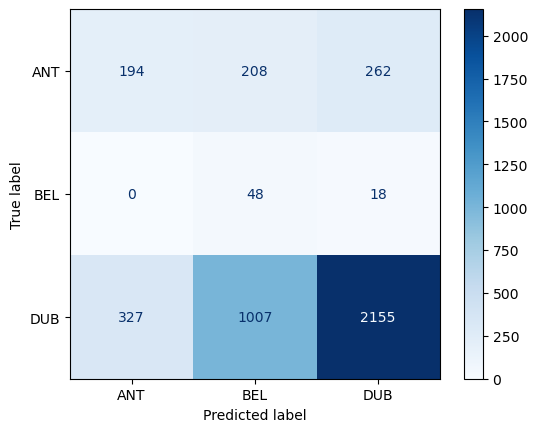

In [216]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lr5.classes_)
disp.plot(cmap='Blues')

In [219]:
y_prob_5 = lr5.predict_proba(X_test_5)

In [220]:
y_prob_5.shape

(4219, 3)

In [221]:
y_prob_5[:, 1]

array([3.96652687e-03, 1.06778953e-03, 6.67655685e-05, ...,
       1.28746351e-01, 2.06531945e-01, 1.63433980e-01])

In [222]:
y_prob_5[0]

array([0.56162026, 0.00396653, 0.43441321])

In [224]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob_5, multi_class='ovr')
# OVR is One versus the Rest: One after the other, one of the output classes is treated as the positive case, all the others as the negative
print(f"ROC AUC Score: {roc_auc:.2%}")


ROC AUC Score: 72.00%


In [225]:
y_score_5 = lr5.predict_proba(X_test_5) # probabilities for each observation to be in each class
y_score_5

array([[5.61620262e-01, 3.96652687e-03, 4.34413212e-01],
       [3.88063732e-01, 1.06778953e-03, 6.10868479e-01],
       [1.26499119e-01, 6.67655685e-05, 8.73434116e-01],
       ...,
       [7.06522407e-01, 1.28746351e-01, 1.64731242e-01],
       [6.61551419e-01, 2.06531945e-01, 1.31916636e-01],
       [6.15298129e-01, 1.63433980e-01, 2.21267891e-01]])

In [226]:
y_score_5[0].sum()

1.0

In [227]:
y_test[0]

'ANT'

In [228]:
# Binarize the output labels
y_test_5_binarized = label_binarize(y_test, classes=['ANT','BEL','DUB'])  
n_classes = y_test_5_binarized.shape[1]

In [229]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_5_binarized[:, i], y_score_5[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area: : this averages the metrics across all classes
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_5_binarized.ravel(), y_score_5.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

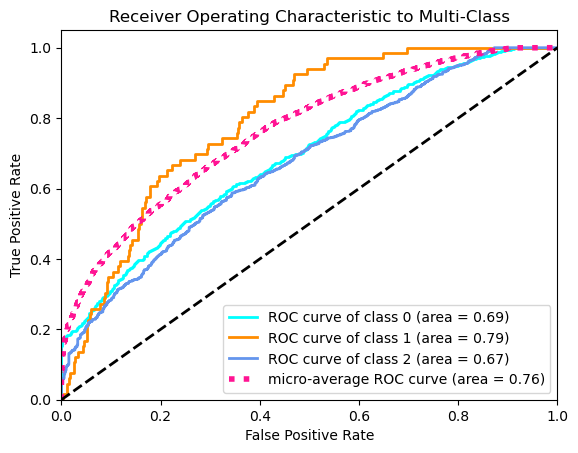

In [230]:
# Plot ROC curves
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()


In [231]:
all_df.columns

Index(['filenames', 'names', 'counties', 'towns', 'urbanrural', 'size',
       'genders', 'ages', 'dur', 'recording num', 'sample num',
       'sample file name', 'sample', 'Ydb', 'sr', 'mfcc', 'mfcc_delta',
       'mfcc_delta_2'],
      dtype='object')

## Model 6: MFCC_delta_2 plus age and genders as inputs

In [234]:
'''
def preprocess_features(feature: str ='mfcc_delta', input: pd.DataFrame =X_train, output: pd.DataFrame ='X_train_5', ): 
    flattened=[]
    flattened_index=input.index
    for j in input[feature]:
        flattened.append(np.array(j.flatten()))
    print(len(flattened))
    output = pd.Series(flattened, index=flattened_index)
    output = np.stack(output.values)
    return output
'''

"\ndef preprocess_features(feature: str ='mfcc_delta', input: pd.DataFrame =X_train, output: pd.DataFrame ='X_train_5', ): \n    flattened=[]\n    flattened_index=input.index\n    for j in input[feature]:\n        flattened.append(np.array(j.flatten()))\n    print(len(flattened))\n    output = pd.Series(flattened, index=flattened_index)\n    output = np.stack(output.values)\n    return output\n"

In [235]:
train_features = preprocess_features(feature="mfcc_delta_2", input=X_train,output='train_features')

17375


In [236]:
test_features = preprocess_features(feature="mfcc_delta_2", input=X_test,output='test_features')

4219


In [237]:
X_train_6 = X_train_2.copy(deep=True)

In [238]:
X_train_6

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80
0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17371,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17372,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17373,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [239]:
X_test_6 = X_test_2.copy(deep=True)

In [240]:
X_test_6

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4215,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4216,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4217,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [241]:
X_train_6['mfcc_delta_2']=list(train_features)


In [242]:
X_test_6['mfcc_delta_2']=list(test_features)


In [243]:
X_train_6

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80,mfcc_delta_2
0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-13.363751, -13.363751, -13.363751, -13.36375..."
1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[8.442614, 8.442614, 8.442614, 8.442614, 8.442..."
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-7.412616, -7.412616, -7.412616, -7.412616, -..."
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-0.45292982, -0.45292982, -0.45292982, -0.452..."
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[11.970617, 11.970617, 11.970617, 11.970617, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-4.0458364, -4.0458364, -4.0458364, -4.045836..."
17371,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[1.0900352, 1.0900352, 1.0900352, 1.0900352, 1..."
17372,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[-6.6832395, -6.6832395, -6.6832395, -6.683239..."
17373,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"[2.0841863, 2.0841863, 2.0841863, 2.0841863, 2..."


In [244]:
X_test_6

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80,mfcc_delta_2
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[3.173503, 3.173503, 3.173503, 3.173503, 3.173..."
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[-19.141376, -19.141376, -19.141376, -19.14137..."
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[8.3602705, 8.3602705, 8.3602705, 8.3602705, 8..."
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[-1.6087068, -1.6087068, -1.6087068, -1.608706..."
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,"[-18.96205, -18.96205, -18.96205, -18.96205, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[4.605235, 4.605235, 4.605235, 4.605235, 4.605..."
4215,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[-1.5239588, -1.5239588, -1.5239588, -1.523958..."
4216,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[-2.5319006, -2.5319006, -2.5319006, -2.531900..."
4217,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"[-2.220233, -2.220233, -2.220233, -2.220233, -..."


In [245]:
X_test_6.columns

Index(['F', 'M', '15', '16', '20', '25', '30', '35', '40', '45', '50', '55',
       '60', '65', '70', '80', 'mfcc_delta_2'],
      dtype='object')

In [246]:
arrays_col = pd.DataFrame(X_test_6['mfcc_delta_2'].tolist(), index=X_test_6.index)
arrays_col.columns = [f'C_{i}' for i in range(arrays_col.shape[1])]

# Drop the original column and concatenate the expanded columns
X_test_6 = X_test_6.drop(columns=['mfcc_delta_2']).join(arrays_col)

In [247]:
arrays_col = pd.DataFrame(X_train_6['mfcc_delta_2'].tolist(), index=X_train_6.index)
arrays_col.columns = [f'C_{i}' for i in range(arrays_col.shape[1])]

# Drop the original column and concatenate the expanded columns
X_train_6 = X_train_6.drop(columns=['mfcc_delta_2']).join(arrays_col)


In [248]:
X_train_6 = scaler.fit_transform(X_train_6)
X_test_6 = scaler.transform(X_test_6)

In [249]:
X_train_6.shape

(17375, 896)

In [250]:
X_test_6.shape

(4219, 896)

In [251]:
lr6=LogisticRegression(multi_class='ovr', max_iter=10000, class_weight='balanced')
lr6.fit(X_train_6, y_train)

C:\Users\GGMachines_Gaming\.conda\envs\audio6\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr')

In [253]:
# Make predictions
y_pred_6= lr6.predict(X_test_5)

In [254]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_6)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 49.44%


In [255]:
y_prob_6 = lr6.predict_proba(X_test_6)

In [256]:
print(classification_report(y_test, y_pred_6))

              precision    recall  f1-score   support

         ANT       0.30      0.29      0.30       664
         BEL       0.02      0.36      0.03        66
         DUB       0.84      0.54      0.65      3489

    accuracy                           0.49      4219
   macro avg       0.39      0.40      0.33      4219
weighted avg       0.75      0.49      0.59      4219



In [257]:
conf_matrix = confusion_matrix(y_test, y_pred_6)

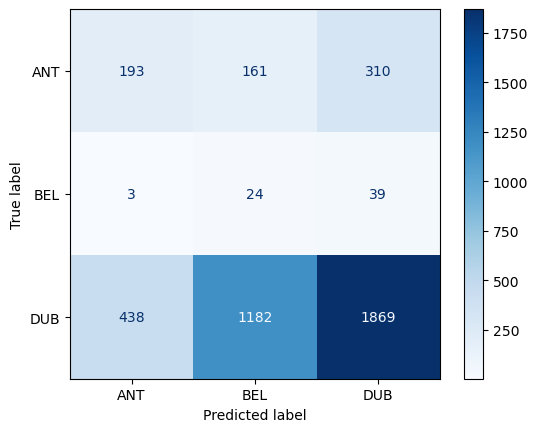

In [271]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lr6.classes_)
disp.plot(cmap='Blues')

In [272]:
y_prob_6 = lr6.predict_proba(X_test_6)

In [260]:
y_prob_6.shape

(4219, 3)

In [261]:
y_prob_6[:, 1]

array([4.77561107e-03, 3.42206992e-04, 6.22116106e-05, ...,
       4.52584027e-02, 2.31876445e-01, 1.40554172e-01])

In [262]:
y_prob_6[0]

array([0.69500349, 0.00477561, 0.3002209 ])

In [263]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob_6, multi_class='ovr')
# OVR is One versus the Rest: One after the other, one of the output classes is treated as the positive case, all the others as the negative
print(f"ROC AUC Score: {roc_auc:.2%}")


ROC AUC Score: 71.54%


In [264]:
y_score_6 = lr6.predict_proba(X_test_6) # probabilities for each observation to be in each class
y_score_6

array([[6.95003485e-01, 4.77561107e-03, 3.00220904e-01],
       [1.82460434e-01, 3.42206992e-04, 8.17197359e-01],
       [2.48241500e-01, 6.22116106e-05, 7.51696289e-01],
       ...,
       [6.45183783e-01, 4.52584027e-02, 3.09557814e-01],
       [5.89513941e-01, 2.31876445e-01, 1.78609614e-01],
       [6.40357038e-01, 1.40554172e-01, 2.19088790e-01]])

In [265]:
y_score_6[0].sum()

1.0

In [266]:
y_test[0]

'ANT'

In [267]:
# Binarize the output labels
y_test_6_binarized = label_binarize(y_test, classes=['ANT','BEL','DUB'])  
n_classes = y_test_6_binarized.shape[1]

In [268]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_6_binarized[:, i], y_score_6[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area: : this averages the metrics across all classes
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_6_binarized.ravel(), y_score_6.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

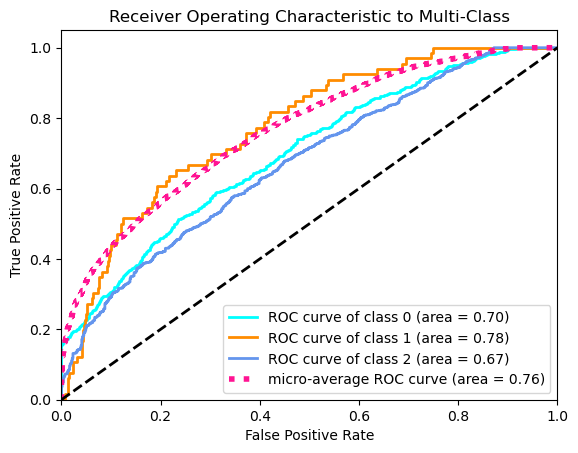

In [270]:
# Plot ROC curves
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()


## Model 7: k Means on MFCC

In [317]:
all_df.shape

(21594, 18)

In [406]:
X_train_3

array([[-2.1866508 , -0.64308554,  0.08682024, ...,  0.06813625,
        -0.15681395,  0.0924673 ],
       [ 0.93851817,  0.8629535 ,  0.7295461 , ...,  1.8066669 ,
         1.6704121 ,  2.0740669 ],
       [ 0.20247592,  0.617136  ,  0.8049803 , ..., -0.30227593,
        -0.86274046, -0.51588   ],
       ...,
       [ 0.5315313 ,  1.2079226 ,  1.505659  , ...,  0.26585707,
        -1.0591234 , -0.8442532 ],
       [ 2.1462593 ,  1.8320223 ,  1.4547827 , ..., -0.31333408,
        -0.09413914, -0.04226546],
       [ 1.2655095 ,  0.98702484,  0.52394676, ..., -1.739631  ,
        -1.3342298 , -0.5293052 ]], dtype=float32)

In [407]:
X_test_3

array([[-3.1537182 , -2.709486  , -2.2055316 , ...,  1.6226373 ,
         1.5295473 ,  1.732828  ],
       [ 0.1207609 ,  0.5341066 ,  0.91428924, ..., -0.33637446,
        -0.8824315 , -0.84309435],
       [ 1.3736465 ,  0.91057277,  0.06756394, ..., -0.81141615,
        -0.6199715 , -0.32379282],
       ...,
       [ 1.3682047 ,  1.2704772 ,  1.5770305 , ..., -1.5360304 ,
         0.00449739,  1.0185899 ],
       [-0.68751365, -0.82650244, -0.8282981 , ...,  0.7616329 ,
         1.4453652 , -0.13988419],
       [ 0.9295425 ,  0.9369783 ,  0.6570131 , ..., -1.2023067 ,
        -0.10702056,  0.6584521 ]], dtype=float32)

In [418]:
X_train_3_scaled = X_train_3
X_test_3_scaled = X_test_3

In [408]:
scaler = StandardScaler()   
X_train_3_scaled = scaler.fit_transform(X_train_3)
X_test_3_scaled = scaler.transform(X_test_3)

In [409]:
from sklearn.cluster import KMeans

In [431]:
n_clusters=2

In [432]:
# Fit K-Means on the training data for MFCC only inputs
kmeans = KMeans(n_clusters=n_clusters, random_state=2)  
kmeans.fit(X_train_3_scaled)

KMeans(n_clusters=2, random_state=2)

In [433]:
# Predict clusters for training and testing data
train_clusters = kmeans.predict(X_train_3_scaled)
test_clusters = kmeans.predict(X_test_3_scaled)

In [434]:
color_palette = sns.color_palette("Set2", n_colors=n_clusters)
dot_size=20

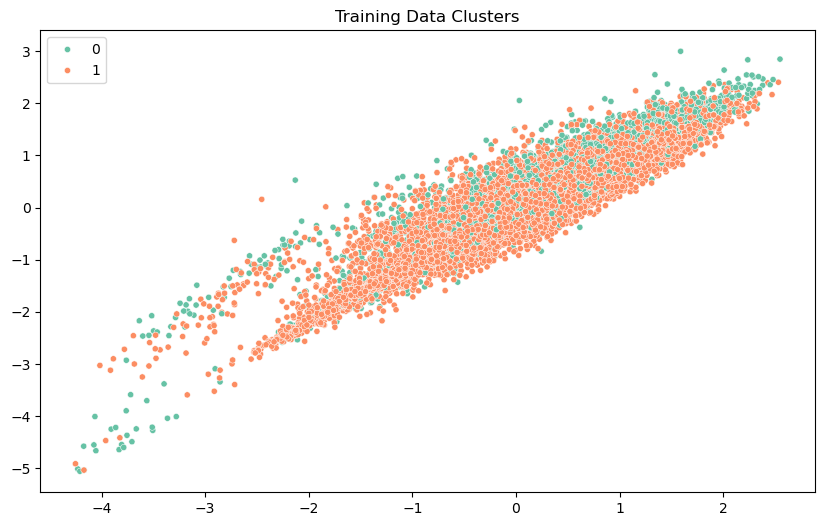

In [435]:
# Training data clusters visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_3_scaled[:, 0], y=X_train_3_scaled[:, 1], hue=train_clusters, palette=color_palette, s=dot_size)
plt.title('Training Data Clusters')
plt.show()

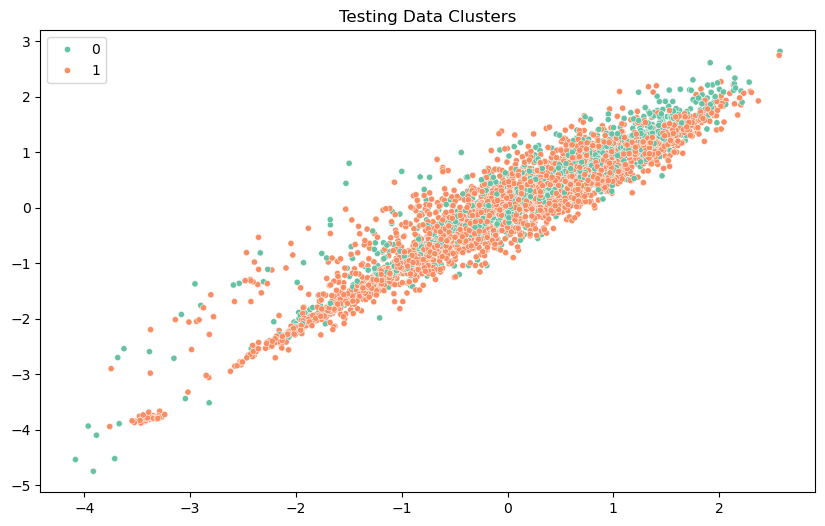

In [436]:
# Testing data clusters visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_3_scaled[:, 0], y=X_test_3_scaled[:, 1], hue=test_clusters, palette=color_palette,s=dot_size)
plt.title('Testing Data Clusters')
plt.show()

## Model 8: k Means on MFCC, gender and age

In [391]:
X_train_4

,F,M,15,16,20,25,30,35,40,45,...,C_870,C_871,C_872,C_873,C_874,C_875,C_876,C_877,C_878,C_879
0,True,False,False,False,True,False,False,False,False,False,...,0.207173,0.200125,0.318383,-0.296801,0.110765,0.277664,0.220833,0.068136,-0.156814,0.092467
1,True,False,False,False,True,False,False,False,False,False,...,0.101419,0.186372,0.238115,-0.222686,0.613735,1.953113,2.600312,1.806667,1.670412,2.074067
2,True,False,False,False,True,False,False,False,False,False,...,-0.161765,-0.353144,-0.075555,0.959332,1.838986,1.451224,0.439420,-0.302276,-0.862740,-0.515880
3,True,False,False,False,True,False,False,False,False,False,...,0.570754,0.316289,0.545552,1.206640,1.596083,1.574030,1.561396,1.412018,1.629660,1.190866
4,True,False,False,False,True,False,False,False,False,False,...,0.240773,1.358918,2.197749,1.315605,-0.188662,-0.438239,0.131140,1.850121,2.318461,1.591941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,True,False,False,False,True,False,False,False,False,False,...,0.732997,-1.143216,-1.125698,-0.580718,-0.540039,0.292756,-0.095114,0.517523,-0.735822,-1.246819
17371,True,False,False,False,True,False,False,False,False,False,...,-0.338850,-0.155501,-0.884213,-1.915800,-2.278487,-2.085958,-0.257908,-0.310056,-0.756404,-0.751726
17372,True,False,False,False,True,False,False,False,False,False,...,0.818556,0.162974,-0.475162,-1.153340,0.012270,0.450451,0.375047,0.265857,-1.059123,-0.844253
17373,True,False,False,False,True,False,False,False,False,False,...,-1.323005,-1.202294,-0.858249,-0.427020,-0.715172,-0.655472,-1.153741,-0.313334,-0.094139,-0.042265


In [392]:
X_test_4

,F,M,15,16,20,25,30,35,40,45,...,C_870,C_871,C_872,C_873,C_874,C_875,C_876,C_877,C_878,C_879
0,False,True,False,False,False,False,False,False,False,False,...,-0.398947,0.043067,-1.410025,-0.484986,0.595395,1.822311,1.558170,1.622637,1.529547,1.732828
1,False,True,False,False,False,False,False,False,False,False,...,0.119795,0.468326,-0.190478,1.167405,2.182246,0.781608,-0.587858,-0.336374,-0.882432,-0.843094
2,False,True,False,False,False,False,False,False,False,False,...,0.578726,0.046252,-0.787799,-1.231581,-1.137064,-0.749349,-0.441123,-0.811416,-0.619972,-0.323793
3,False,True,False,False,False,False,False,False,False,False,...,-0.072458,-1.620389,-1.386842,-0.647069,-1.549025,-0.989175,-0.803911,0.078236,0.174964,-0.272848
4,False,True,False,False,False,False,False,False,False,False,...,0.444185,-0.941844,-0.351171,0.043888,-0.114938,-0.085531,0.482371,0.859255,0.576046,-0.163585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,True,False,False,False,False,False,True,False,False,False,...,0.344584,1.902003,1.592089,-0.304466,-0.340278,0.503974,1.108006,1.323880,1.242763,1.292384
4215,True,False,False,False,False,False,True,False,False,False,...,-0.104808,-0.310170,-0.548165,0.370527,0.875378,1.421380,1.265643,0.545110,-0.807416,-1.517576
4216,True,False,False,False,False,False,True,False,False,False,...,0.337998,0.148842,0.571235,0.199005,-0.597185,-1.407288,-1.562652,-1.536030,0.004497,1.018590
4217,True,False,False,False,False,False,True,False,False,False,...,0.106187,0.706497,0.667460,-0.981186,-1.512899,-1.223387,-0.616736,0.761633,1.445365,-0.139884


In [417]:
X_train_4[0:3]

,F,M,15,16,20,25,30,35,40,45,...,C_870,C_871,C_872,C_873,C_874,C_875,C_876,C_877,C_878,C_879
0,True,False,False,False,True,False,False,False,False,False,...,0.207173,0.200125,0.318383,-0.296801,0.110765,0.277664,0.220833,0.068136,-0.156814,0.092467
1,True,False,False,False,True,False,False,False,False,False,...,0.101419,0.186372,0.238115,-0.222686,0.613735,1.953113,2.600312,1.806667,1.670412,2.074067
2,True,False,False,False,True,False,False,False,False,False,...,-0.161765,-0.353144,-0.075555,0.959332,1.838986,1.451224,0.439420,-0.302276,-0.862740,-0.515880


In [437]:
n_clusters=2

In [441]:
X_train_4_scaled = X_train_4
X_test_4_scaled = X_test_4

In [439]:
X_train_4_scaled = scaler.fit_transform(X_train_4)
X_test_4_scaled = scaler.transform(X_test_4)

In [442]:
# Fit K-Means on the training data
kmeans = KMeans(n_clusters=n_clusters, random_state=2)  
kmeans.fit(X_train_4_scaled)

KMeans(n_clusters=2, random_state=2)

In [443]:
# Predict clusters for training and testing data
train_clusters = kmeans.predict(X_train_4_scaled)
test_clusters = kmeans.predict(X_test_4_scaled)

In [444]:
color_palette = sns.color_palette("Set2", n_colors=n_clusters)
dot_size=20

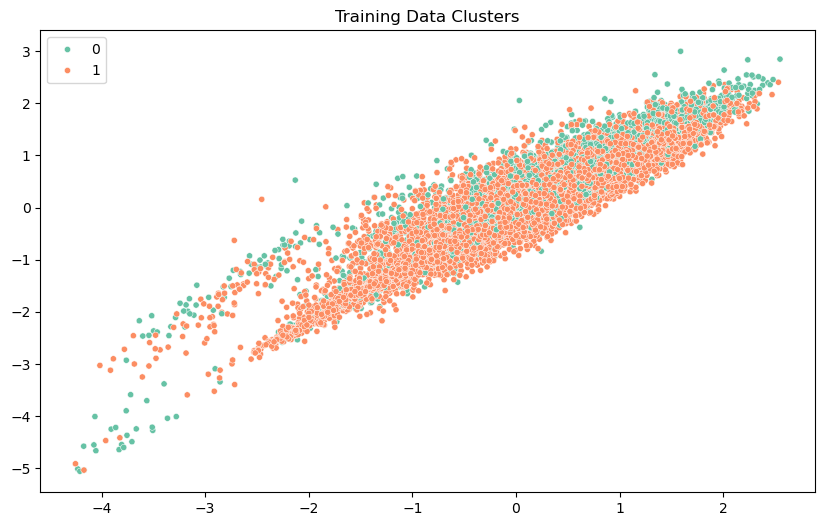

In [445]:
# Training data clusters visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_3_scaled[:, 0], y=X_train_3_scaled[:, 1], hue=train_clusters, palette=color_palette, s=dot_size)
plt.title('Training Data Clusters')
plt.show()

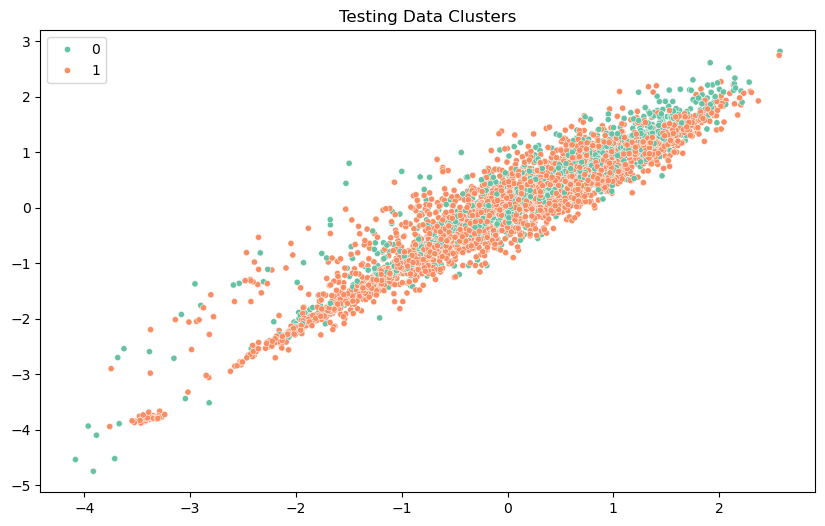

In [446]:
# Testing data clusters visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_3_scaled[:, 0], y=X_test_3_scaled[:, 1], hue=test_clusters, palette=color_palette,s=dot_size)
plt.title('Testing Data Clusters')
plt.show()

In [379]:
X_train_4

,F,M,15,16,20,25,30,35,40,45,...,C_870,C_871,C_872,C_873,C_874,C_875,C_876,C_877,C_878,C_879
0,True,False,False,False,True,False,False,False,False,False,...,0.207173,0.200125,0.318383,-0.296801,0.110765,0.277664,0.220833,0.068136,-0.156814,0.092467
1,True,False,False,False,True,False,False,False,False,False,...,0.101419,0.186372,0.238115,-0.222686,0.613735,1.953113,2.600312,1.806667,1.670412,2.074067
2,True,False,False,False,True,False,False,False,False,False,...,-0.161765,-0.353144,-0.075555,0.959332,1.838986,1.451224,0.439420,-0.302276,-0.862740,-0.515880
3,True,False,False,False,True,False,False,False,False,False,...,0.570754,0.316289,0.545552,1.206640,1.596083,1.574030,1.561396,1.412018,1.629660,1.190866
4,True,False,False,False,True,False,False,False,False,False,...,0.240773,1.358918,2.197749,1.315605,-0.188662,-0.438239,0.131140,1.850121,2.318461,1.591941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,True,False,False,False,True,False,False,False,False,False,...,0.732997,-1.143216,-1.125698,-0.580718,-0.540039,0.292756,-0.095114,0.517523,-0.735822,-1.246819
17371,True,False,False,False,True,False,False,False,False,False,...,-0.338850,-0.155501,-0.884213,-1.915800,-2.278487,-2.085958,-0.257908,-0.310056,-0.756404,-0.751726
17372,True,False,False,False,True,False,False,False,False,False,...,0.818556,0.162974,-0.475162,-1.153340,0.012270,0.450451,0.375047,0.265857,-1.059123,-0.844253
17373,True,False,False,False,True,False,False,False,False,False,...,-1.323005,-1.202294,-0.858249,-0.427020,-0.715172,-0.655472,-1.153741,-0.313334,-0.094139,-0.042265


## Features

In [314]:
X_train_3.shape

(17375, 880)

In [319]:
X_test_3.shape

(4219, 880)

In [316]:
X_train

,mfcc,mfcc_delta,mfcc_delta_2,recording num,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80
0,"[[-494.3632, -314.76587, -256.5209, -248.23921...","[[22.54509, 22.54509, 22.54509, 22.54509, 22.5...","[[-13.363751, -13.363751, -13.363751, -13.3637...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,"[[-200.87267, -189.22813, -205.93425, -217.350...","[[1.7263998, 1.7263998, 1.7263998, 1.7263998, ...","[[8.442614, 8.442614, 8.442614, 8.442614, 8.44...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,"[[-269.9958, -209.71855, -199.9971, -192.51334...","[[7.1880474, 7.1880474, 7.1880474, 7.1880474, ...","[[-7.412616, -7.412616, -7.412616, -7.412616, ...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,"[[-319.19656, -307.64944, -314.54547, -295.997...","[[9.711183, 9.711183, 9.711183, 9.711183, 9.71...","[[-0.45292982, -0.45292982, -0.45292982, -0.45...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,"[[-238.38216, -228.49149, -256.09305, -273.210...","[[15.645952, 15.645952, 15.645952, 15.645952, ...","[[11.970617, 11.970617, 11.970617, 11.970617, ...",0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,"[[-110.30995, -99.04926, -126.198555, -136.179...","[[-18.052214, -18.052214, -18.052214, -18.0522...","[[-4.0458364, -4.0458364, -4.0458364, -4.04583...",231,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17371,"[[-97.73651, -89.979546, -113.11529, -134.1764...","[[-12.304473, -12.304473, -12.304473, -12.3044...","[[1.0900352, 1.0900352, 1.0900352, 1.0900352, ...",231,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17372,"[[-239.09358, -160.47281, -144.84918, -154.863...","[[6.8850102, 6.8850102, 6.8850102, 6.8850102, ...","[[-6.6832395, -6.6832395, -6.6832395, -6.68323...",231,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17373,"[[-87.451416, -108.45021, -148.85347, -161.430...","[[-3.5998185, -3.5998185, -3.5998185, -3.59981...","[[2.0841863, 2.0841863, 2.0841863, 2.0841863, ...",231,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


## Clustering analysis - k nearest neighbours 

## knn 5 on age and gender

In [273]:
X_train_2

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80
0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17371,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17372,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17373,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [274]:
X_test_2

,F,M,15,16,20,25,30,35,40,45,50,55,60,65,70,80
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4215,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4216,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4217,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [275]:
y_train

0        ANT
1        ANT
2        ANT
3        ANT
4        ANT
        ... 
17370    DUB
17371    DUB
17372    DUB
17373    DUB
17374    DUB
Name: counties, Length: 17375, dtype: object

In [283]:
knn1 = KNeighborsClassifier(n_neighbors=5, weights='distance')  # You can choose the number of neighbors
knn1.fit(X_train_2, y_train)

KNeighborsClassifier(weights='distance')

In [284]:
y_pred = knn1.predict(X_test_2)

In [285]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 80.49%


## knn 5 neighbours on MFCC only

In [296]:
X_train_3

array([[-2.1866508 , -0.64308554,  0.08682024, ...,  0.06813625,
        -0.15681395,  0.0924673 ],
       [ 0.93851817,  0.8629535 ,  0.7295461 , ...,  1.8066669 ,
         1.6704121 ,  2.0740669 ],
       [ 0.20247592,  0.617136  ,  0.8049803 , ..., -0.30227593,
        -0.86274046, -0.51588   ],
       ...,
       [ 0.5315313 ,  1.2079226 ,  1.505659  , ...,  0.26585707,
        -1.0591234 , -0.8442532 ],
       [ 2.1462593 ,  1.8320223 ,  1.4547827 , ..., -0.31333408,
        -0.09413914, -0.04226546],
       [ 1.2655095 ,  0.98702484,  0.52394676, ..., -1.739631  ,
        -1.3342298 , -0.5293052 ]], dtype=float32)

In [297]:
X_test_3

array([[-3.1537182 , -2.709486  , -2.2055316 , ...,  1.6226373 ,
         1.5295473 ,  1.732828  ],
       [ 0.1207609 ,  0.5341066 ,  0.91428924, ..., -0.33637446,
        -0.8824315 , -0.84309435],
       [ 1.3736465 ,  0.91057277,  0.06756394, ..., -0.81141615,
        -0.6199715 , -0.32379282],
       ...,
       [ 1.3682047 ,  1.2704772 ,  1.5770305 , ..., -1.5360304 ,
         0.00449739,  1.0185899 ],
       [-0.68751365, -0.82650244, -0.8282981 , ...,  0.7616329 ,
         1.4453652 , -0.13988419],
       [ 0.9295425 ,  0.9369783 ,  0.6570131 , ..., -1.2023067 ,
        -0.10702056,  0.6584521 ]], dtype=float32)

In [287]:
X_train_3.shape

(17375, 19)

In [298]:
X_test_3.shape

(4219, 880)

In [302]:
knn2 = KNeighborsClassifier(n_neighbors=5,weights='distance')  # You can choose the number of neighbors
knn2.fit(X_train_3, y_train)

KNeighborsClassifier(weights='distance')

In [303]:
from sklearn.metrics import accuracy_score

In [305]:
y_pred = knn2.predict(X_test_3)

In [308]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 80.30%


In [309]:
X_test_3

array([[-3.1537182 , -2.709486  , -2.2055316 , ...,  1.6226373 ,
         1.5295473 ,  1.732828  ],
       [ 0.1207609 ,  0.5341066 ,  0.91428924, ..., -0.33637446,
        -0.8824315 , -0.84309435],
       [ 1.3736465 ,  0.91057277,  0.06756394, ..., -0.81141615,
        -0.6199715 , -0.32379282],
       ...,
       [ 1.3682047 ,  1.2704772 ,  1.5770305 , ..., -1.5360304 ,
         0.00449739,  1.0185899 ],
       [-0.68751365, -0.82650244, -0.8282981 , ...,  0.7616329 ,
         1.4453652 , -0.13988419],
       [ 0.9295425 ,  0.9369783 ,  0.6570131 , ..., -1.2023067 ,
        -0.10702056,  0.6584521 ]], dtype=float32)

In [310]:
y_test

0       ANT
1       ANT
2       ANT
3       ANT
4       ANT
       ... 
4214    DUB
4215    DUB
4216    DUB
4217    DUB
4218    DUB
Name: counties, Length: 4219, dtype: object

In [ ]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors
knn.fit(X_train_1, y_train)

In [ ]:
y_pred = knn1.predict(X_test_1)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
X_test_1.columns

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

In [ ]:
X_test_1

In [ ]:
y_test

In [ ]:
results_out={'predicted':y_pred,
             'counties': y_test.values,'recording num': X_test['recording num'],
             'M': X_test['M'],'F': X_test['F'],
             'M': X_test['M'],'16': X_test['16'],
             '20': X_test['20'],
             '25': X_test['25'],
             '30': X_test['30'],
             '35': X_test['35'],
             '40': X_test['40'],
             '50': X_test['50'],
             '55': X_test['55'],
             '60': X_test['60'],
             '70': X_test['70'],
             '80': X_test['80']          
            }

In [ ]:
results_out_df=pd.DataFrame(results_out)

In [ ]:
results_out_df

In [ ]:
results_out_df.sort_values(by='recording num')

In [ ]:
X_test_2=X_test.drop(columns=['recording num','mfcc'])

In [ ]:
X_test_2

In [ ]:
X_train_2=X_train.drop(columns=['recording num','mfcc'])

In [ ]:
X_train_2

In [ ]:
# Create and train the KNN classifierb
knn2 = KNeighborsClassifier(n_neighbors=2)  # You can choose the number of neighbors
knn2.fit(X_train_2, y_train)

In [ ]:
y_pred_2 = knn2.predict(X_test_2)

In [ ]:
y_pred_2

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred_2)
print(f'Accuracy: {accuracy:.2%}')

In [ ]:
results_out_2={'predicted':y_pred_2,'counties': y_test.values}

In [ ]:
results_out_2_df=pd.DataFrame(results_out_2)

In [ ]:
results_out_2_df[0:10]

In [ ]:
results_out_2_df.to_csv('results_out_2_df.csv')

## Plotting results

In [ ]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame(X_test_scaled,columns=['genders','counties','age'])
plot_df['True Y'] = y_test.values
plot_df['Predicted Y'] = y_pred

# Plot the true clusters
plt.figure(figsize=(12, 5))

In [ ]:
plt.subplot(1, 2, 1)
sns.scatterplot(data=plot_df, x='genders', y='counties', hue='True Y', palette='viridis')
plt.title('True Clusters')
plt.xlabel('genders')
plt.ylabel('counties')

# Plot the predicted clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=plot_df, x='genders', y='counties', hue='Predicted Y', palette='viridis')
plt.title('Predicted Clusters')
plt.xlabel('genders')
plt.ylabel('counties')

plt.tight_layout()
plt.show()

In [ ]:
y_pred = knn.predict(X_test_scaled)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(X_test_scaled, columns=['X1', 'X2', 'X3'])
plot_df['True Y'] = y_test.values
plot_df['Predicted Y'] = y_pred

# Plot the true clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=plot_df, x='X1', y='X2', hue='True Y', palette='viridis')
plt.title('True Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

# Plot the predicted clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=plot_df, x='X1', y='X2', hue='Predicted Y', palette='viridis')
plt.title('Predicted Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()